# 图像处理滤波器

滤波器是对一个或多个图像进行数学运算以产生新图像的操作。输入和输出图像之间的像素值可能会不同。

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data
from skimage import filters
from skimage import morphology
from scipy.ndimage import convolve, gaussian_laplace
import stackview

为了演示特定滤波器的作用，我们从一个非常简单的图像开始。它包含许多零值和中间有一个值为`1`的单个像素。

In [2]:
image1 = np.zeros((5, 5))
image1[2, 2] = 1
image1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

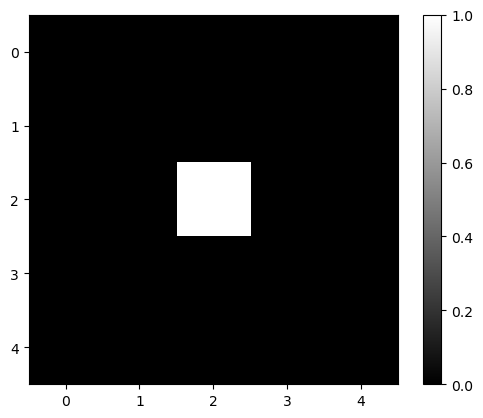

In [3]:
plt.imshow(image1, cmap='gray')
plt.colorbar()

## 高斯核
要对图像应用_高斯模糊_，我们使用高斯核进行卷积。scikit-image中的[`gaussian`函数](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian)可以为我们完成这项工作。

In [4]:
blurred = filters.gaussian(image1, sigma=1)
blurred

array([[0.00291504, 0.01306431, 0.02153941, 0.01306431, 0.00291504],
       [0.01306431, 0.05855018, 0.09653293, 0.05855018, 0.01306431],
       [0.02153941, 0.09653293, 0.15915589, 0.09653293, 0.02153941],
       [0.01306431, 0.05855018, 0.09653293, 0.05855018, 0.01306431],
       [0.00291504, 0.01306431, 0.02153941, 0.01306431, 0.00291504]])

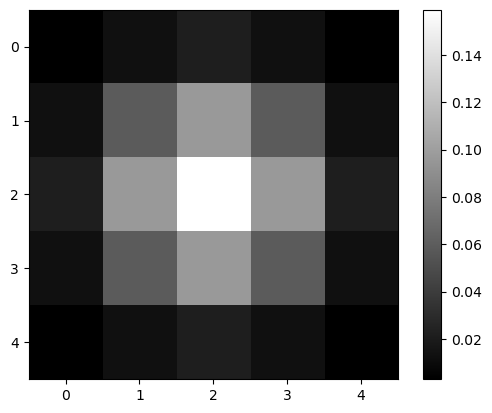

In [5]:
plt.imshow(blurred, cmap='gray')
plt.colorbar()

## 拉普拉斯算子
当你想知道滤波器可能在做什么时，只需创建一个简单的测试图像并对其应用滤波器即可。

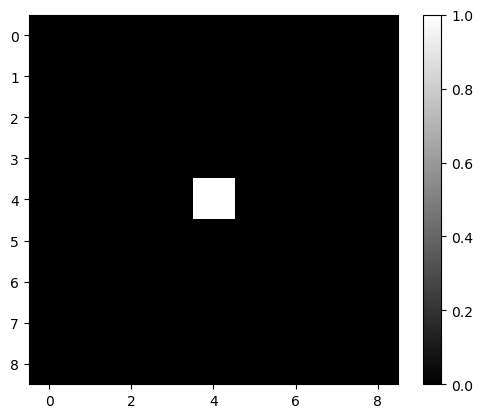

In [6]:
image2 = np.zeros((9, 9))
image2[4, 4] = 1

plt.imshow(image2, cmap='gray')
plt.colorbar()

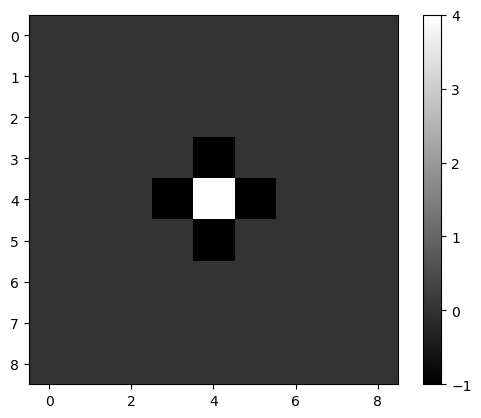

In [7]:
mexican_hat = filters.laplace(image2)

plt.imshow(mexican_hat, cmap='gray')
plt.colorbar()

## 高斯拉普拉斯算子

我们还可以组合滤波器，例如使用函数。如果我们对图像应用高斯滤波器，然后应用拉普拉斯算子，根据定义，我们就得到了一个执行_高斯拉普拉斯_（LoG）的滤波器。

In [8]:
def laplacian_of_gaussian(image, sigma):
    """
    对图像应用高斯核，然后应用拉普拉斯算子。
    """
    
    # 使用高斯核模糊图像
    intermediate_result = filters.gaussian(image, sigma)
    
    # 应用墨西哥帽滤波器（拉普拉斯）
    result = filters.laplace(intermediate_result)
    
    return result

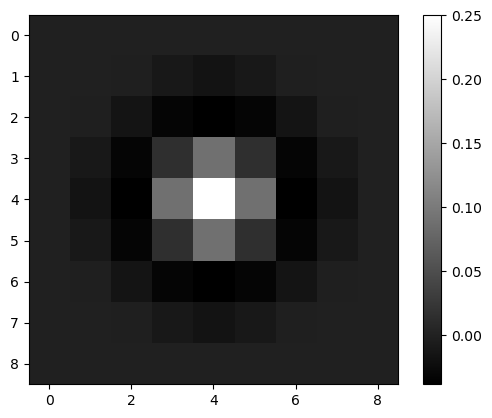

In [9]:
log_image1 = laplacian_of_gaussian(image2, sigma=1)

plt.imshow(log_image1, cmap='gray')
plt.colorbar()

## 交互式滤波器参数调整
为了更好地理解滤波器的作用，建议交互式地应用它们。以下代码在github.com上不会渲染。你需要在本地执行notebook才能使用这个交互式用户界面。

In [10]:
image3 = imread('../../data/mitosis_mod.tif').astype(float)

In [11]:
stackview.interact(laplacian_of_gaussian, image3, zoom_factor=4)

## 练习

编写一个函数来计算[高斯差分](https://en.wikipedia.org/wiki/Difference_of_Gaussians)。

In [ ]:
def difference_of_gaussian(image, sigma1, sigma2):
    
    # 在此处输入代码

使用简单的函数调用来尝试该函数。

In [ ]:
dog_image = difference_of_gaussian(image3, 1, 5)

plt.imshow(dog_image, cmap='gray')

使用[stackview](https://github.com/haesleinhuepf/stackview)库进行交互式操作。

In [ ]:
stackview.interact(difference_of_gaussian, image3)